# 1. Problem statement:- 

### In this project we will be predicting the Grade of milk  based on  pH value, Temprature, Taste,Odor, Fat, Turbidity, & Colour.

# 2.Libraries

In [41]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve, multilabel_confusion_matrix
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score



import warnings
warnings.filterwarnings('ignore')

# 3.Data Gathering

In [2]:
df = pd.read_csv('milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# 4.Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [5]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

# 5.Feature Engineering

## Outlier imputed by mean

### 5.1 pH

<AxesSubplot:xlabel='pH'>

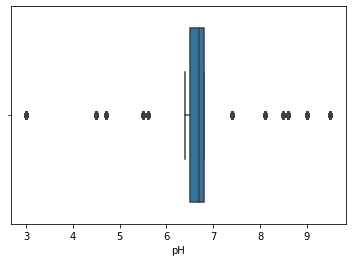

In [7]:
sns.boxplot(x= df['pH'])

In [8]:
q1_pH= df['pH'].quantile(0.25)
q2_pH= df['pH'].quantile(0.50)
q3_pH= df['pH'].quantile(0.75)
median_pH = df['pH'].median()
print("Q1_pH :", q1_pH)
print("Q2_pH:", q2_pH)
print("Q3_pH :", q3_pH)
print("median_pH :", median_pH)

iqr_pH = q3_pH - q1_pH

upper_tail_pH = q3_pH + 1.5*iqr_pH
lower_tail_pH = q1_pH - 1.5*iqr_pH
print("upper_tail  :",upper_tail_pH)
print("lower_tail  :",lower_tail_pH)

Q1_pH : 6.5
Q2_pH: 6.7
Q3_pH : 6.8
median_pH : 6.7
upper_tail  : 7.25
lower_tail  : 6.050000000000001


In [9]:
mean_pH = df.loc[(df['pH'] <= upper_tail_pH) &
(df['pH'] >= lower_tail_pH),'pH'].mean()
mean_pH

6.65720588235294

In [10]:
df.loc[(df['pH'] > upper_tail_pH) |
(df['pH'] < lower_tail_pH),'pH'] = mean_pH

In [11]:
df.loc[(df['pH'] > upper_tail_pH) |
(df['pH'] < lower_tail_pH),'pH']

Series([], Name: pH, dtype: float64)

<AxesSubplot:xlabel='pH'>

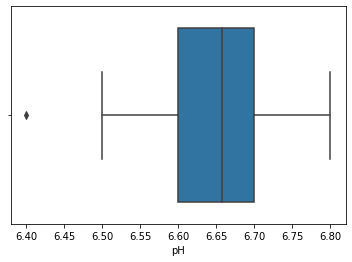

In [12]:
sns.boxplot(x= df['pH'])

### 5.2 Temperature

<AxesSubplot:xlabel='Temprature'>

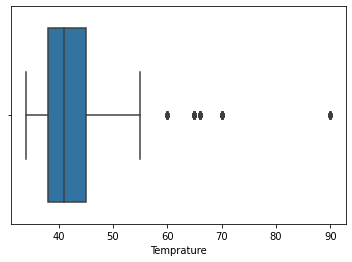

In [13]:
sns.boxplot(x= df['Temprature'])

In [14]:
q1_Temprature= df['Temprature'].quantile(0.25)
q2_Temprature= df['Temprature'].quantile(0.50)
q3_Temprature= df['Temprature'].quantile(0.75)
median_Temprature = df['Temprature'].median()
print("Q1_Temprature :", q1_Temprature)
print("Q2_Temprature:", q2_Temprature)
print("Q3_Temprature :", q3_Temprature)
print("median_Temprature :", median_Temprature)

iqr_Temprature = q3_Temprature - q1_Temprature

upper_tail_Temprature = q3_Temprature + 1.5*iqr_Temprature
lower_tail_Temprature = q1_Temprature - 1.5*iqr_Temprature
print("upper_tail  :",upper_tail_Temprature)
print("lower_tail  :",lower_tail_Temprature)

Q1_Temprature : 38.0
Q2_Temprature: 41.0
Q3_Temprature : 45.0
median_Temprature : 41.0
upper_tail  : 55.5
lower_tail  : 27.5


In [16]:
mean_Temprature = df.loc[(df['Temprature'] <= upper_tail_Temprature) &
(df['Temprature'] >= lower_tail_Temprature),'Temprature'].mean()
mean_Temprature

41.49790794979079

In [17]:
df.loc[(df['Temprature'] > upper_tail_Temprature) |
(df['Temprature'] < lower_tail_Temprature),'Temprature'] = mean_Temprature

In [18]:
df.loc[(df['Temprature'] > upper_tail_Temprature) |
(df['Temprature'] < lower_tail_Temprature),'Temprature']

Series([], Name: Temprature, dtype: float64)

<AxesSubplot:xlabel='Temprature'>

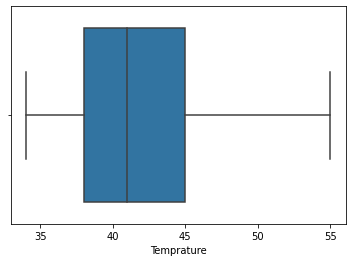

In [19]:
sns.boxplot(x= df['Temprature'])

### 5.3 Taste

<AxesSubplot:xlabel='Taste'>

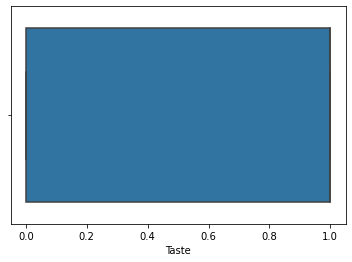

In [20]:
sns.boxplot(x= df['Taste'])

## 5.4 Odor

<AxesSubplot:xlabel='Odor'>

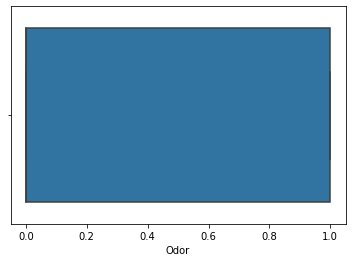

In [21]:
sns.boxplot(x= df['Odor'])

### 5.5 Fat

In [22]:
sns.boxplot(x= df['Fat'])

KeyError: 'Fat'

### 5.6 Turbidity

<AxesSubplot:xlabel='Turbidity'>

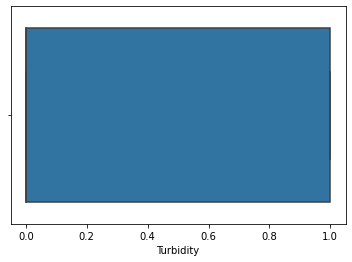

In [23]:
sns.boxplot(x= df['Turbidity'])

### 5.7 Colour

<AxesSubplot:xlabel='Colour'>

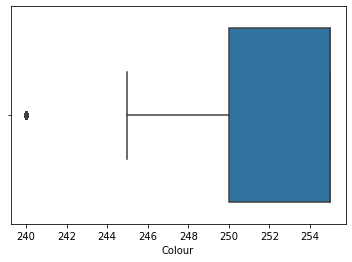

In [24]:
sns.boxplot(x= df['Colour'])

In [25]:
q1_Colour= df['Colour'].quantile(0.25)
q2_Colour= df['Colour'].quantile(0.50)
q3_Colour= df['Colour'].quantile(0.75)
median_Colour = df['Colour'].median()
print("Q1_Colour :", q1_Colour)
print("Q2_Colour:", q2_Colour)
print("Q3_Colour :", q3_Colour)
print("median_Colour :", median_Colour)

iqr_Colour = q3_Colour  - q1_Colour

upper_tail_Colour = q3_Colour + 1.5*iqr_Colour
lower_tail_Colour = q1_Colour - 1.5*iqr_Colour
print("upper_tail  :",upper_tail_Colour)
print("lower_tail  :",lower_tail_Colour)

Q1_Colour : 250.0
Q2_Colour: 255.0
Q3_Colour : 255.0
median_Colour : 255.0
upper_tail  : 262.5
lower_tail  : 242.5


In [26]:
mean_Colour = df.loc[(df['Colour'] <= upper_tail_Colour) &
(df['Colour'] >= lower_tail_Colour),'Colour'].mean()
mean_Colour

252.20934761441092

<AxesSubplot:xlabel='Colour'>

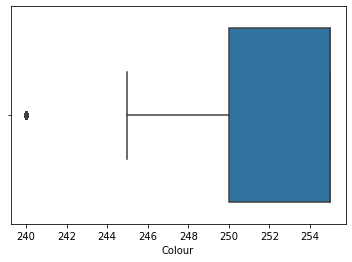

In [27]:
sns.boxplot(x= df['Colour'])

#  Algorithm-1:- Logistic Regression 

## 6 Train Test Split

In [28]:
x = df.drop('Grade',axis = 1)
y = df['Grade']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=11,stratify=y)

In [29]:
y_train.value_counts()

low       322
medium    280
high      192
Name: Grade, dtype: int64

In [30]:
y_test.value_counts()

low       107
medium     94
high       64
Name: Grade, dtype: int64

## Model Training

In [31]:
logistic_model = LogisticRegression(multi_class= 'ovr')
logistic_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

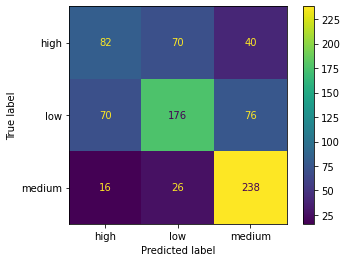

In [33]:
plot_confusion_matrix(logistic_model,x_train, y_train)

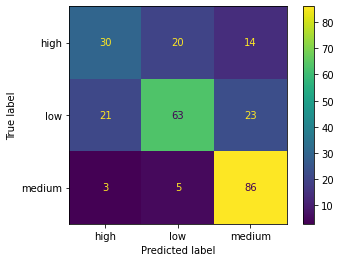

In [34]:
plot_confusion_matrix(logistic_model,x_test, y_test)

In [35]:
logistic_model.score(x_train, y_train)

0.6246851385390428

In [36]:
logistic_model.score(x_test, y_test)

0.6754716981132075

## Model Evaluation

In [37]:
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[30 20 14]
 [21 63 23]
 [ 3  5 86]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[177  24]
  [ 34  30]]

 [[133  25]
  [ 44  63]]

 [[134  37]
  [  8  86]]]
****************************************************************************************
Accuracy : 0.6754716981132075
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.56      0.47      0.51        64
         low       0.72      0.59      0.65       107
      medium       0.70      0.91      0.79        94

    accuracy                           0.68       265
   macro avg       0.66      0.66      0.65       265
weighted avg       0.67      0.68      0.66       265



In [38]:
# Training Data Evaluation
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 82  70  40]
 [ 70 176  76]
 [ 16  26 238]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[516  86]
  [110  82]]

 [[376  96]
  [146 176]]

 [[398 116]
  [ 42 238]]]
****************************************************************************************
Accuracy : 0.6246851385390428
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.49      0.43      0.46       192
         low       0.65      0.55      0.59       322
      medium       0.67      0.85      0.75       280

    accuracy                           0.62       794
   macro avg       0.60      0.61      0.60       794
weighted avg       0.62      0.62      0.62       794



# # KNN_Classifier

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)

In [43]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)


clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 59   5   0]
 [  0 107   0]
 [  0   1  93]]
Accuracy is : 0.9773584905660377
Classification Report :
               precision    recall  f1-score   support

        high       1.00      0.92      0.96        64
         low       0.95      1.00      0.97       107
      medium       1.00      0.99      0.99        94

    accuracy                           0.98       265
   macro avg       0.98      0.97      0.98       265
weighted avg       0.98      0.98      0.98       265



In [45]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[186   4   2]
 [  0 319   3]
 [  2   2 276]]
********************************************************************************
Accuracy is : 0.9836272040302267
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.99      0.97      0.98       192
         low       0.98      0.99      0.99       322
      medium       0.98      0.99      0.98       280

    accuracy                           0.98       794
   macro avg       0.98      0.98      0.98       794
weighted avg       0.98      0.98      0.98       794



In [46]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(x)
x_normal = pd.DataFrame(array,columns=x.columns)
x_normal

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,0.500000,0.047619,1.0,0.0,1.0,0.0,0.933333
1,0.500000,0.095238,0.0,1.0,0.0,1.0,0.866667
2,0.643015,0.357043,1.0,1.0,1.0,1.0,0.400000
3,0.643015,0.000000,1.0,1.0,0.0,1.0,1.000000
4,0.500000,0.142857,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...
1054,0.750000,0.523810,1.0,1.0,0.0,0.0,0.466667
1055,0.750000,0.190476,1.0,0.0,1.0,0.0,1.000000
1056,0.643015,0.285714,1.0,1.0,1.0,1.0,1.000000
1057,1.000000,0.428571,1.0,0.0,1.0,0.0,0.666667


In [47]:
# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)


clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 59   5   0]
 [  0 107   0]
 [  0   1  93]]
Accuracy is : 0.9773584905660377
Classification Report :
               precision    recall  f1-score   support

        high       1.00      0.92      0.96        64
         low       0.95      1.00      0.97       107
      medium       1.00      0.99      0.99        94

    accuracy                           0.98       265
   macro avg       0.98      0.97      0.98       265
weighted avg       0.98      0.98      0.98       265



In [48]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[186   4   2]
 [  0 319   3]
 [  2   2 276]]
********************************************************************************
Accuracy is : 0.9836272040302267
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.99      0.97      0.98       192
         low       0.98      0.99      0.99       322
      medium       0.98      0.99      0.98       280

    accuracy                           0.98       794
   macro avg       0.98      0.98      0.98       794
weighted avg       0.98      0.98      0.98       794



## DT Algorithm

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)

In [50]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
# test data Evaluation

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 63   0   1]
 [  0 104   3]
 [  0   0  94]]
Accuracy : 0.9849056603773585
Classification Report :
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        64
         low       1.00      0.97      0.99       107
      medium       0.96      1.00      0.98        94

    accuracy                           0.98       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.98      0.98       265



In [52]:
# train data Evaluation

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[192   0   0]
 [  0 322   0]
 [  0   0 280]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       192
         low       1.00      1.00      1.00       322
      medium       1.00      1.00      1.00       280

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794



## Random forest Algorithm

In [53]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
## Training Data Evaluation 

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[192   0   0]
 [  0 322   0]
 [  0   0 280]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       192
         low       1.00      1.00      1.00       322
      medium       1.00      1.00      1.00       280

    accuracy                           1.00       794
   macro avg       1.00      1.00      1.00       794
weighted avg       1.00      1.00      1.00       794



In [55]:
## Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[ 63   1   0]
 [  0 107   0]
 [  0   0  94]]
********************************************************************************
Accuracy : 0.9962264150943396
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        64
         low       0.99      1.00      1.00       107
      medium       1.00      1.00      1.00        94

    accuracy                           1.00       265
   macro avg       1.00      0.99      1.00       265
weighted avg       1.00      1.00      1.00       265



## Predict on single Row

In [58]:
x_test.iloc[15]

pH              6.5
Temprature     38.0
Taste           1.0
Odor            0.0
Fat             0.0
Turbidity       0.0
Colour        255.0
Name: 199, dtype: float64

In [69]:
pH  = 1.5
Temprature =50.0
Taste   =  0.0
Odor  =  1.0
Fat =  1.0
Turbidity =  2.0
Colour =155.0

test_array = np.array([[pH,Temprature,Taste,Odor,Fat,Turbidity,Colour]])
test_array
predicted_class = logistic_model.predict(test_array)[0]
predicted_class

'low'

In [70]:
project_data = {'columns' : list(x.columns)}
project_data

{'columns': ['pH',
  'Temprature',
  'Taste',
  'Odor',
  'Fat ',
  'Turbidity',
  'Colour']}

## Pickle file

In [56]:
import pickle

with open("knn_clf.pkl",'wb') as f:
    pickle.dump(logistic_model,f)

# json file

In [71]:
import json

with open("project_data.json",'w') as f:
    json.dump(project_data,f)